# Unit 5 - Financial Planning


In [356]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [357]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [358]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [359]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [360]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [363]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_usd = btc_response.json()['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_usd

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_usd = eth_response.json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_usd
my_eth_value = my_eth * eth_usd

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $13,016.98
The current value of your 5.3 ETH is $1,956.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [364]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [365]:
# Set Alpaca API key and secret
load_dotenv()
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [366]:
# Format current date as ISO format
today = pd.Timestamp("2020-09-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio['SPY']['close'])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.24
Current SPY closing price: $330.69


In [367]:
# Compute the current value of shares
my_spy_shares = 50
my_agg_shares = 200
my_spy_value = spy_close_price * my_spy_shares
my_agg_value = agg_close_price * my_agg_shares

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $16,534.50
The current value of your 200 AGG shares is $23,648.00


### Savings Health Analysis

In [368]:
# Create savings DataFrame
df = {
    'asset':['crypto','shares'],
    'amount':[(my_btc_value + my_eth_value),(my_spy_value + my_agg_value)]
    
}
df_savings = pd.DataFrame(data=df)
df_savings.set_index('asset',inplace=True)

# Display savings DataFrame
display(df_savings)

amount
asset          
crypto  14973.1
shares  40182.5

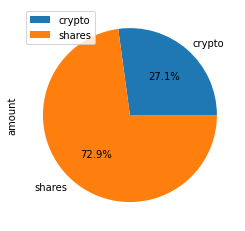

In [369]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',autopct='%1.1f%%')

In [370]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value

# Validate saving health
if savings > emergency_fund:
    print('You have more than enough in savings.')
elif savings == emergency_fund:
    print('You have enough in savings.')
else:
    print('Unfortunately your savings is insufficient. You need at least ${:,.0f} more.'.format(emergency_fund - savings))

You have more than enough in savings.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [371]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [372]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [373]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [374]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [375]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2          3          4         5    \
0      1.000000  1.000000   1.000000   1.000000   1.000000  1.000000   
1      0.997998  0.990784   1.006676   1.002950   1.014957  1.014284   
2      1.011800  0.993323   1.009787   1.007634   1.001080  1.019286   
3      1.018592  0.980881   1.003562   1.000745   1.012743  1.023944   
4      1.016393  0.987144   1.011956   1.016178   1.029227  1.024169   
...         ...       ...        ...        ...        ...       ...   
7556  24.209895  6.276725  20.046212  19.077041  17.052671  4.835629   
7557  24.397426  6.288153  19.999153  19.009835  16.906246  4.808472   
7558  24.395941  6.303528  20.139187  18.922640  16.926092  4.805391   
7559  24.358768  6.204096  20.057570  18.830948  16.949625  4.817188   
7560  24.267050  6.262246  20.094120  18.607336  16.852360  4.808225   

           6          7          8          9    ...        490       491  \
0     1.000000   1.000000   1.000000   1.000000  ...   1.000000  1.000000   
1     1.008405   0.985143   0.990339   1.007155  ...   0.999046  1.004073   
2     1.012669   0.987940   0.988496   1.011604  ...   1.002609  1.003311   
3     1.018035   0.976302   0.977869   1.014919  ...   1.004702  1.004709   
4     1.027630   0.971478   0.980344   1.003440  ...   0.999838  1.018412   
...        ...        ...        ...        ...  ...        ...       ...   
7556  8.701414  10.559078  11.249446  14.125531  ...  15.558269  5.288794   
7557  8.631673  10.518999  11.278469  14.016084  ...  15.650486  5.188966   
7558  8.548670  10.512953  11.308547  14.020122  ...  15.736176  5.219909   
7559  8.566153  10.497930  11.333077  14.264346  ...  15.881706  5.195204   
7560  8.597738  10.595819  11.449405  14.309305  ...  15.911378  5.161435   

           492       493       494        495       496       497       498  \
0     1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
1     1.003688  0.996278  1.004268   0.997205  0.991265  0.998116  1.003039   
2     0.994341  0.989461  1.003425   1.000585  0.984804  0.994730  1.017184   
3     0.995146  0.985494  1.003498   1.006877  0.974438  1.006843  1.015631   
4     1.001896  0.987178  1.018279   1.005905  0.974069  1.006776  1.017621   
...        ...       ...       ...        ...       ...       ...       ...   
7556  2.815097  4.855990  4.588588  10.343735  4.399879  2.383802  2.432378   
7557  2.833730  4.840137  4.535265  10.288848  4.406962  2.400901  2.414990   
7558  2.813940  4.863448  4.533529  10.281990  4.400937  2.401676  2.404857   
7559  2.858495  4.850419  4.495872  10.390352  4.430159  2.410400  2.414721   
7560  2.865000  4.924008  4.476301  10.504376  4.402592  2.421273  2.440573   

           499  
0     1.000000  
1     0.993791  
2     1.002438  
3     0.997565  
4     1.006191  
...        ...  
7556  1.578422  
7557  1.583151  
7558  1.593738  
7559  1.581686  
7560  1.576014  

[7561 rows x 500 columns]

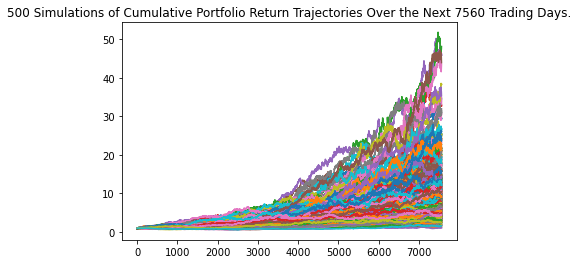

In [376]:
# Plot simulation outcomes
line_plot_thirty = MC_30year.plot_simulation()
line_plot_thirty.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches='tight')

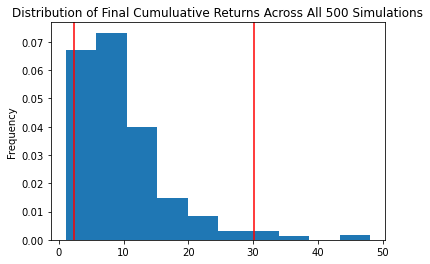

In [377]:
# Plot probability distribution and confidence intervals
dist_plot_thirty = MC_30year.plot_distribution()
dist_plot_thirty.get_figure().savefig('MC_30year_dist_plot.png', bbox_inches='tight')

### Retirement Analysis

In [378]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_thirty = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl_thirty)

count           500.000000
mean              9.873213
std               7.038452
min               1.085536
25%               5.125037
50%               8.058324
75%              12.420045
max              48.060238
95% CI Lower      2.344939
95% CI Upper     30.109639
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [379]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

lower_bound = tbl[8]
upper_bound = tbl[9]

ci_lower = initial_investment * lower_bound
ci_upper = initial_investment * upper_bound

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_thirty} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44,223.87 and $560,874.14


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [380]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * lower_bound
ci_upper = initial_investment * upper_bound

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $66,335.81 and $841,311.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [381]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [382]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.988632  1.002619  0.994596  0.998710  0.999697  1.000855  0.999365   
2     0.977401  1.017691  1.001456  1.006347  1.000862  0.999976  1.005228   
3     0.983807  1.025444  0.995683  1.019566  0.998691  1.000697  1.000771   
4     0.992900  1.027995  1.007330  1.009576  0.999540  1.000219  0.992854   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.419843  1.453073  0.920528  1.508615  1.724291  1.134374  2.102649   
1257  1.431077  1.454467  0.917034  1.506591  1.737114  1.135462  2.111062   
1258  1.427080  1.447472  0.929891  1.511585  1.722702  1.134967  2.112684   
1259  1.434880  1.468534  0.921869  1.521213  1.737168  1.133504  2.115267   
1260  1.448976  1.478249  0.923614  1.530125  1.748345  1.128192  2.102786   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997300  0.993633  0.998436  ...  0.999193  0.998052  0.991232   
2     1.010245  0.980137  1.002327  ...  0.985339  1.008301  0.978498   
3     1.009018  0.981866  1.003390  ...  0.973045  1.002282  0.998154   
4     1.019350  0.977527  1.000531  ...  0.969093  0.994853  1.010243   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.087154  1.455848  1.343325  ...  1.410336  1.361174  1.057983   
1257  1.109295  1.460725  1.346200  ...  1.413863  1.362981  1.054752   
1258  1.101141  1.475416  1.339690  ...  1.418864  1.372230  1.047339   
1259  1.106745  1.466711  1.354418  ...  1.430099  1.364396  1.041012   
1260  1.116760  1.478960  1.366908  ...  1.443411  1.367273  1.034018   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.989277  0.997353  1.004186  1.027132  1.016362  0.995251  0.998057  
2     0.991590  0.992208  1.012488  1.023135  1.028374  1.003579  0.994234  
3     0.995880  0.986108  1.012044  1.031376  1.038133  1.003080  0.993517  
4     0.992562  0.983118  1.017704  1.031324  1.043240  1.015310  0.987982  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.171047  1.224398  1.477542  1.175443  1.507054  1.214663  0.826269  
1257  1.182585  1.221031  1.482995  1.180238  1.503351  1.209893  0.831753  
1258  1.189420  1.217565  1.481199  1.179200  1.504022  1.230520  0.829367  
1259  1.207334  1.204636  1.488656  1.177532  1.492397  1.239686  0.827607  
1260  1.192735  1.197878  1.482600  1.176972  1.503359  1.248873  0.829031  

[1261 rows x 500 columns]

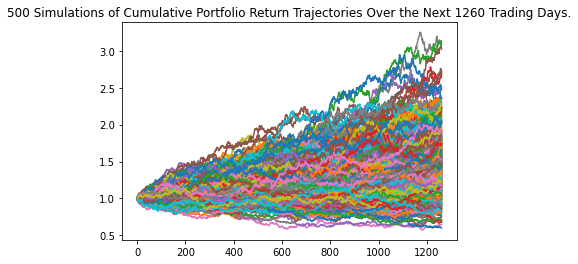

In [383]:
# Plot simulation outcomes
line_plot_five = MC_5year.plot_simulation()
line_plot_five.get_figure().savefig("MC_5year_sim_plot.png", bbox_inches='tight')

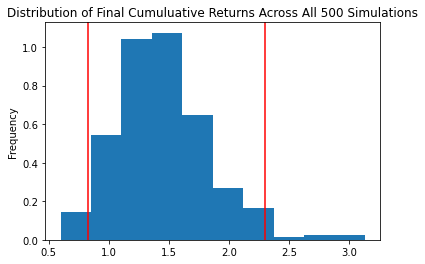

In [384]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_5year.plot_distribution()
dist_plot_five.get_figure().savefig('MC_5year_dist_plot.png', bbox_inches='tight')

In [385]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.447864
std               0.389732
min               0.598442
25%               1.180692
50%               1.418268
75%               1.661698
max               3.129627
95% CI Lower      0.829945
95% CI Upper      2.295236
Name: 1260, dtype: float64


In [386]:
# Set initial investment
initial_investment_five = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_bound_five = tbl_five[8]
upper_bound_five = tbl_five[9]
ci_lower_five = initial_investment_five * lower_bound_five
ci_upper_five = initial_investment_five * upper_bound_five

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16,598.90 and $45,904.72


### Ten Years Retirement Option

In [387]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [388]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.008548  1.002208  1.007813  1.005571  1.011539  1.002055  0.992384   
2     1.007428  0.996386  0.996634  1.007958  1.020071  1.004844  0.988051   
3     1.012537  0.996489  1.003391  1.005569  1.020929  1.018848  0.988759   
4     1.025914  1.002074  1.002038  0.994091  1.021946  1.015213  0.969420   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.928696  3.084881  3.219868  1.495994  1.609270  3.954386  2.806171   
2517  2.923521  3.061098  3.201692  1.499257  1.603987  3.934512  2.792725   
2518  2.933563  3.030598  3.176602  1.484982  1.600074  3.972638  2.790660   
2519  2.961601  2.967273  3.182013  1.494280  1.608072  3.989636  2.797658   
2520  2.955672  2.989854  3.186186  1.517816  1.589316  4.015062  2.778661   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.008950  0.997428  1.010838  ...  1.006335  1.007344  1.009076   
2     1.022742  1.002900  1.010534  ...  1.008806  1.000233  1.019796   
3     1.026391  1.007194  1.016282  ...  1.022740  1.008388  1.016498   
4     1.031991  1.014084  1.008306  ...  1.016336  1.013077  1.012212   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.624437  1.237619  2.065695  ...  1.935768  0.945735  2.047303   
2517  2.625853  1.222699  2.084491  ...  1.922448  0.954868  2.049240   
2518  2.661105  1.213997  2.072461  ...  1.912130  0.957656  2.039719   
2519  2.691985  1.222676  2.091935  ...  1.904225  0.960443  2.056181   
2520  2.676275  1.216950  2.063451  ...  1.913622  0.963703  2.013842   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.996407  0.997183  0.993994  0.997544  0.993758  1.009560  0.996209  
2     0.989477  0.999447  0.986798  0.995549  0.978037  1.009200  0.984138  
3     0.985786  0.999341  0.980934  0.996607  0.980796  0.998458  0.984215  
4     0.978703  0.991208  0.968171  1.005193  0.992692  1.002890  0.980374  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.775763  2.804322  1.332247  1.115143  2.105931  2.931012  1.978385  
2517  2.771554  2.841842  1.345716  1.122895  2.107003  2.922734  1.974408  
2518  2.785892  2.855844  1.348978  1.113256  2.100825  2.912471  1.979603  
2519  2.773364  2.864534  1.357042  1.115335  2.087451  2.900842  1.981002  
2520  2.766074  2.841367  1.362504  1.118499  2.064015  2.919118  1.989479  

[2521 rows x 500 columns]

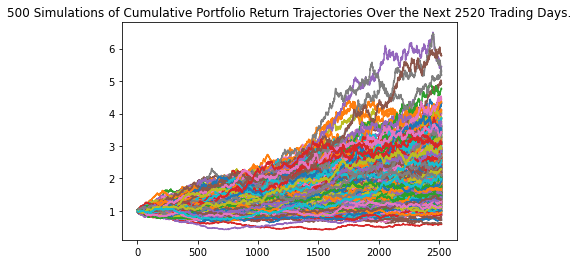

In [389]:
# Plot simulation outcomes
line_plot_ten = MC_10year.plot_simulation()
line_plot_ten.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches='tight')

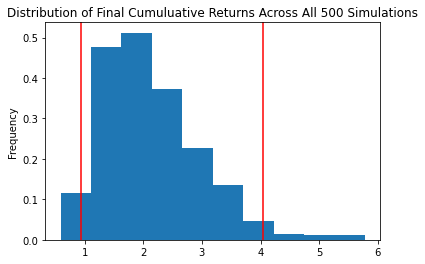

In [390]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_10year.plot_distribution()
dist_plot_ten.get_figure().savefig('MC_10year_dist_plot.png', bbox_inches='tight')

In [391]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.142244
std               0.831080
min               0.586869
25%               1.539774
50%               1.999746
75%               2.605619
max               5.781133
95% CI Lower      0.936084
95% CI Upper      4.038267
Name: 2520, dtype: float64


In [392]:
# Set initial investment
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_bound_ten = tbl_ten[8]
upper_bound_ten = tbl_ten[9]
ci_lower_ten = initial_investment_ten * lower_bound_ten
ci_upper_ten = initial_investment_ten * upper_bound_ten

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18,721.68 and $80,765.34
